<a href="https://colab.research.google.com/github/chiaravanin/CursoCoder/blob/main/ProyectoDS_PArteIVANIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO DATA SCIENCE - PARTE I

**ABSTRACT:**
Este proyecto analiza un dataset de clientes de un banco, incluyendo información sociodemográfica, productos contratados, actividad, digitalización y días de uso. El objetivo es explorar patrones de comportamiento, segmentación, identificar relaciones entre productos y características de clientes, y proponer insights que puedan ayudar a la institución a mejorar su estrategia comercial y de retención. A través de visualizaciones interactivas en Python se buscan responder preguntas sobre la distribución de clientes por provincia, edad y género, la adopción de productos financieros, la relación entre actividad digital y cantidad de productos, y el impacto del saldo deudor y del último uso de productos sobre la cartera total de clientes. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.


***Preguntas / Hipótesis de interés***
*Distribución de clientes*
¿Qué provincias concentran mayor cantidad de clientes?
¿Cómo se distribuye la cartera según rangos etarios y género?
¿Existen diferencias en la cantidad de productos contratados según la provincia o el segmento de cartera?
*Productos bancarios*
¿Qué porcentaje de clientes tiene tarjeta de crédito, caja de ahorro en pesos, dólares o caja de seguridad?
¿La tenencia de seguros o plazos fijos varía según la edad o el segmento de cartera?
¿Los clientes con mayor cantidad de productos presentan mayor saldo deudor?

*Digitalización y uso*
¿Qué proporción de clientes utiliza canales digitales?
¿Los clientes digitales realizan un uso más frecuente de productos en comparación con los no digitales?
¿La adopción digital cambia significativamente entre provincias o grupos etarios?

*Riesgo y endeudamiento*
¿Cómo se distribuye el saldo deudor entre los distintos segmentos de cartera?
¿Los clientes activos difieren en su nivel de deuda respecto a los inactivos?
¿Existen grupos de mayor riesgo (alto saldo deudor + baja cantidad de productos + inactividad)?

In [19]:
from google.colab import drive

In [20]:
import pandas as pd


In [21]:
# 1. Montar Drive en /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mi Data Frame superaba el limite de tamaño de GitHUb por eso tuve importarlo desde mi google drive

In [22]:
# 2. La ruta del archivo
url = '/content/drive/MyDrive/Coderhouse/DF_ChiaraVanin.csv'

# 3. Leer el CSV con pandas
df = pd.read_csv(url, sep=';')

# 4. Mostrar las primeras filas
df.head(5)

,CANTIDAD_CLIENTES,PROVINCIA,IND_ACTIVO,CANTIDAD_PRODUCTOS,SEGURO,CAJA_SEGURIDAD,CAJA_AHORRO_USD,TJ_CREDITO,PLAZOS_FIJOS,CTA_CTE,CAJA_AHORRO,Rango_Edad_Nuevo,Segmentacion_Carteras,GÉNERO,Segmento_Tarjeta,IND_DIGITAL,ULTIMO_USO,SALDO_DEUDOR
0,1,MENDOZA,Activo,1,No,No,No,No,No,No,Si,Entre 29 y 38 Años,Cartera Haberes,MASCULINO,4 -Internacional,Y,62.0,0.0
1,1,CORDOBA,Activo,6,Si,No,Si,Si,No,Si,Si,Entre 18 y 28 Años,Cartera Haberes,FEMENINO,4 -Internacional,Y,0.0,0.0
2,1,SAN JUAN,Inactivo,2,No,No,No,No,No,No,Si,Entre 59 y 68 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,153.0,0.0
3,1,SANTA CRUZ,Activo,2,No,No,No,Si,No,No,Si,Entre 39 y 48 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,28.0,0.0
4,3,CORRIENTES,Activo,2,No,No,No,No,Si,No,Si,Entre 39 y 48 Años,Cartera Previsional,FEMENINO,NaN,N,3.0,0.0


In [23]:
df.shape #Tamaño de mi Data Frame

(1257673, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CANTIDAD_CLIENTES      1257673 non-null  int64  
 1   PROVINCIA              1257673 non-null  object 
 2   IND_ACTIVO             1257673 non-null  object 
 3   CANTIDAD_PRODUCTOS     1257673 non-null  int64  
 4   SEGURO                 1257673 non-null  object 
 5   CAJA_SEGURIDAD         1257673 non-null  object 
 6   CAJA_AHORRO_USD        1257673 non-null  object 
 7   TJ_CREDITO             1257673 non-null  object 
 8   PLAZOS_FIJOS           1257673 non-null  object 
 9   CTA_CTE                1257673 non-null  object 
 10  CAJA_AHORRO            1257673 non-null  object 
 11  Rango_Edad_Nuevo       1257673 non-null  object 
 12  Segmentacion_Carteras  1231339 non-null  object 
 13  GÉNERO                 1257662 non-null  object 
 14  Segmento_Tarjeta  

In [25]:
df.isnull().sum()


,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


Se observa que hay valores faltantes en columnas como Segmentacion_carteras, segmento_tarjeta y ultimo_uso. Se dejarán o imputarán según necesidad del análisis.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

Distribución de Clientes por Género


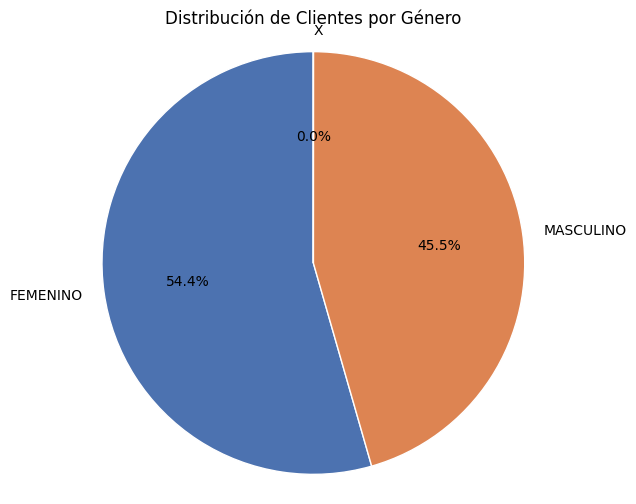

In [59]:
import matplotlib.pyplot as plt
colors = sns.color_palette('deep')
df_genero = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("Distribución de Clientes por Género")
plt.axis('equal')

plt.show()



La distribucion de clientes es bastante equitativa entre mujeres y hombres, pero predomina el genero femenino. Por otro lado  hay un porcentaje que no llega al 1% que no se identifica con los generos tradicionales.

LOS CLIENTES SEGUN RANGO ETARIO

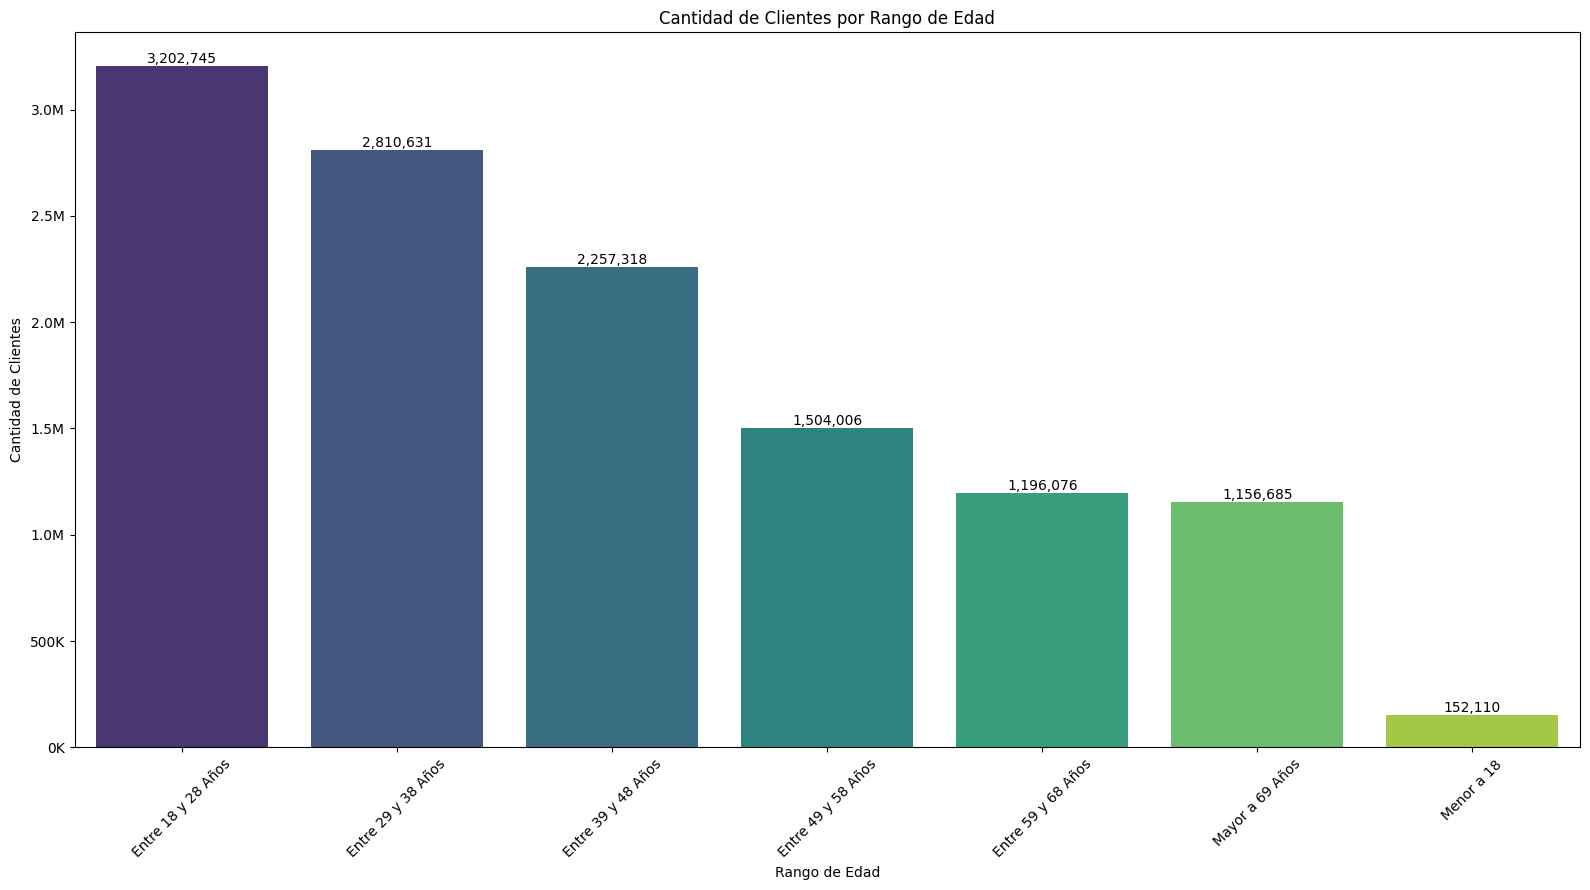

In [49]:
import seaborn as sns


df_edad = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().reset_index()
orden_rangos = df_edad.sort_values('Rango_Edad_Nuevo')['Rango_Edad_Nuevo']

#Grafico
plt.figure(figsize=(16,9))
ax= sns.barplot(x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue= 'Rango_Edad_Nuevo', data=df_edad, order=orden_rangos, palette= 'viridis')
plt.title("Cantidad de Clientes por Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Cantidad de Clientes")

from matplotlib.ticker import FuncFormatter
def formato_miles(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # millones con 1 decimal
    else:
        return f'{x*1e-3:.0f}K'  # miles sin decimales

ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.xticks(rotation=45)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # convertimos a entero
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición sobre la barra
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


plt.show()


Los clientes bancarizados son mayoritariamente jovenes.

Top 10 - Provincias con mas clientes

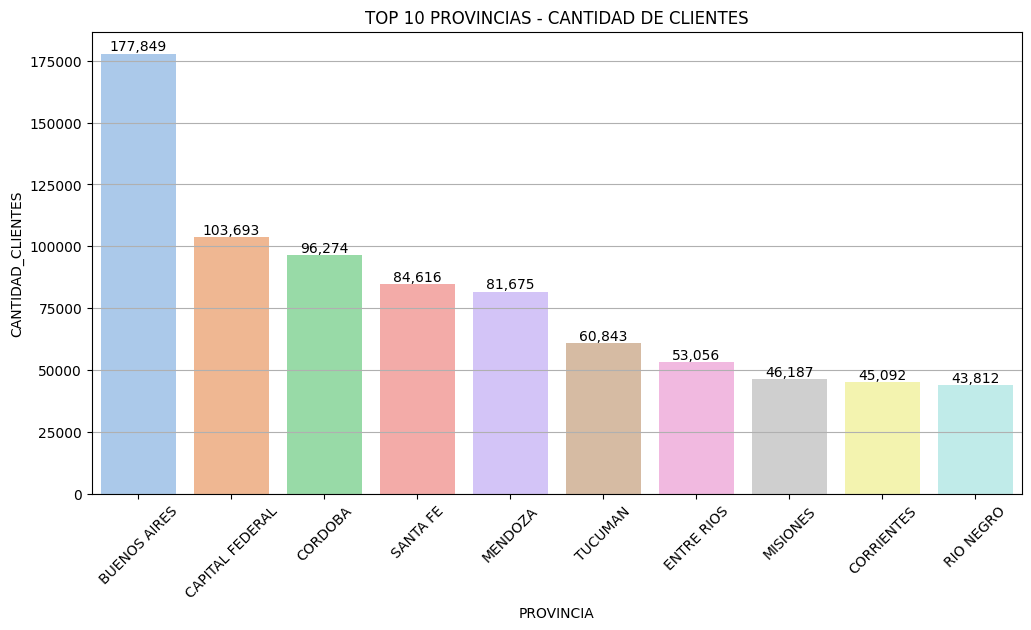

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 provincias por cantidad de clientes
top_provincias = df['PROVINCIA'].value_counts().head(10).index
df_top = df[df['PROVINCIA'].isin(top_provincias)]

# Contar cantidad de clientes por provincia
provincia_counts = df_top['PROVINCIA'].value_counts().reset_index()
provincia_counts.columns = ['PROVINCIA', 'CANTIDAD_CLIENTES']

# Gráfico
plt.figure(figsize=(12,6))
ax= sns.barplot(data=provincia_counts, x='PROVINCIA', hue= 'PROVINCIA', y='CANTIDAD_CLIENTES', palette='pastel')
plt.title('TOP 10 PROVINCIAS - CANTIDAD DE CLIENTES')
plt.xticks(rotation=45)
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # convertimos a int
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()
